# Estimation of obesity levels based on eating habits and physical conditioning

## Data Description

__Target Variable__

`NObeyesdad` - Based on BMI - Categorical


__Responders Characteristic__ <br>

`Age` - Float <br>
`Height` - Float <br>
`Weight` - Float <br>
`Gender` - Category <br>
`Family history with overweight` - Category <br>

__Eating Habits__ <br>

`FAVC` - Frequent consumption of high caloric food - Category <br>
`FCVC` - Frequency of consumption of vegetables - Ordinal <br>
`NCP` - Number of main meals - Ordinal <br>
`CAEC` - Consumption of food between meals - Ordinal <br>
`CH20` - Consumption of water daily - Ordinal <br>
`CALC` - Consumption of alcohol - Ordinal <br>

__Physical Conditioning__ <br>

`SCC` - Calories consumption monitoring - Category <br>
`FAF` - Pysical activity frequency - Ordinal <br>
`TUE` - Time using technology devices - Ordinal <br>
`MTRANS` - Transportation used - Category <br>
`SMOKE` - Category <br>

## Libraries

In [1]:
#Import libraries - pandas, numpy, matplotlib, sklearn, pydotplus, stringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus  
from six import StringIO
import warnings
warnings.filterwarnings("ignore")

## Data exploration and EDA

In [2]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.rename(columns = {'family_history_with_overweight':'FHWO'}, inplace = True)

In [3]:
df.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.shape

(2111, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      2111 non-null   object 
 1   Age         2111 non-null   float64
 2   Height      2111 non-null   float64
 3   Weight      2111 non-null   float64
 4   FHWO        2111 non-null   object 
 5   FAVC        2111 non-null   object 
 6   FCVC        2111 non-null   float64
 7   NCP         2111 non-null   float64
 8   CAEC        2111 non-null   object 
 9   SMOKE       2111 non-null   object 
 10  CH2O        2111 non-null   float64
 11  SCC         2111 non-null   object 
 12  FAF         2111 non-null   float64
 13  TUE         2111 non-null   float64
 14  CALC        2111 non-null   object 
 15  MTRANS      2111 non-null   object 
 16  NObeyesdad  2111 non-null   object 
dtypes: float64(8), object(9)
memory usage: 280.5+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [7]:
for c in df.columns:
    if df[c].dtype == object:
        print(df[c].value_counts(ascending = False))
        print("\n")

Male      1068
Female    1043
Name: Gender, dtype: int64


yes    1726
no      385
Name: FHWO, dtype: int64


yes    1866
no      245
Name: FAVC, dtype: int64


Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64


no     2067
yes      44
Name: SMOKE, dtype: int64


no     2015
yes      96
Name: SCC, dtype: int64


Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64


Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64


Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64




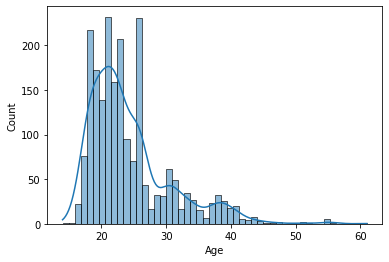

In [8]:
#Distibution of Age
sns.histplot(data=df, x="Age", kde=True)
plt.show()

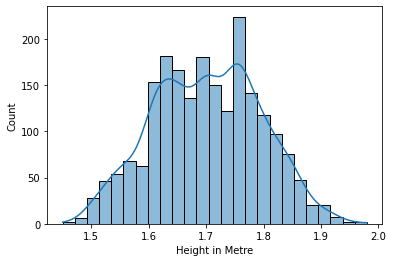

In [9]:
#Distribution of Height
ax = sns.histplot(data=df, x="Height", kde=True)
ax.set(xlabel='Height in Metre', ylabel='Count')
plt.show()

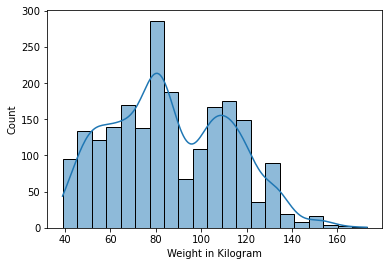

In [10]:
#Distribution of Weight
ax = sns.histplot(data=df, x="Weight", kde=True)
ax.set(xlabel='Weight in Kilogram', ylabel='Count')
plt.show()

In [11]:
#round(5.58)
#df['FCVC'].astype('int32').round()

In [12]:
#Convert categorical data from float to int to be used as ordinal categorical data
#Keeping them as numbers so that we don't have to encode them while training models
ocolumns = ['FCVC','NCP','CH2O','FAF','TUE']

for col in ocolumns:
    df[col] = df[col].astype('int32').round()

In [13]:
df.dtypes

Gender         object
Age           float64
Height        float64
Weight        float64
FHWO           object
FAVC           object
FCVC            int32
NCP             int32
CAEC           object
SMOKE          object
CH2O            int32
SCC            object
FAF             int32
TUE             int32
CALC           object
MTRANS         object
NObeyesdad     object
dtype: object

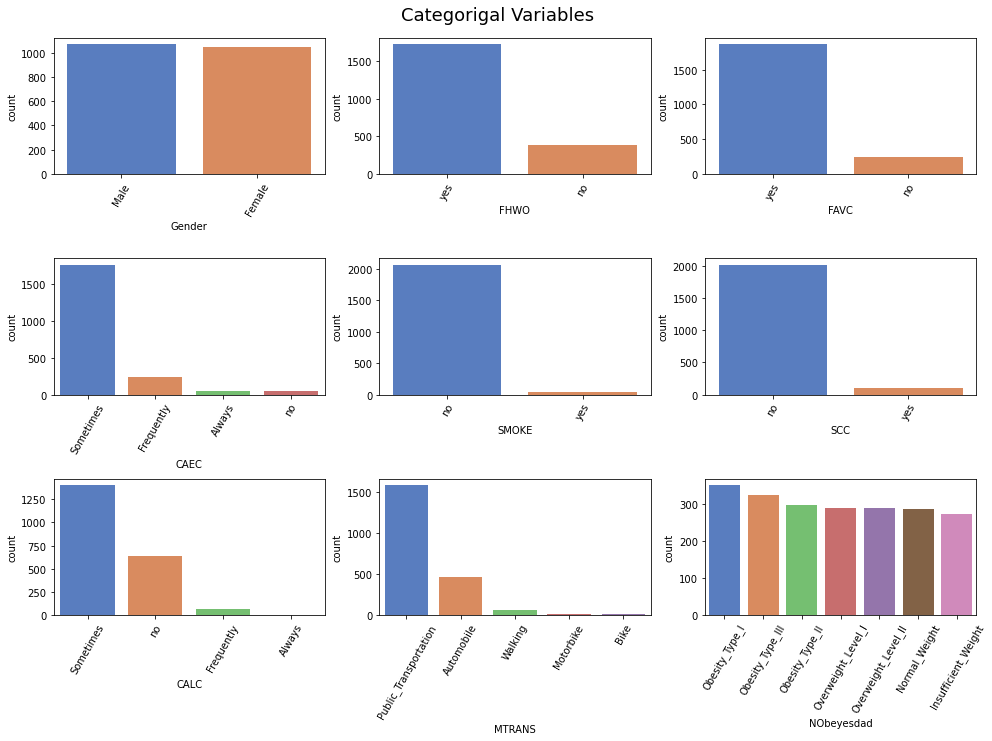

In [14]:
#Categorical variables
columns = ['Gender', 'FHWO', 'FAVC', 'CAEC', 'SMOKE','SCC', 'CALC', 'MTRANS', 'NObeyesdad']

fig, ax = plt.subplots(3, 3, figsize=(15, 12))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(data= df, x = df[col], ax=subplot, order = df[col].value_counts().index, palette="muted")
    for item in subplot.get_xticklabels():
        item.set_rotation(60)
    
# show figure & plots
fig.suptitle("Categorigal Variables", y = 0.9, fontsize = 18)
plt.tight_layout(pad=5, w_pad=0.8, h_pad=1)
plt.show()

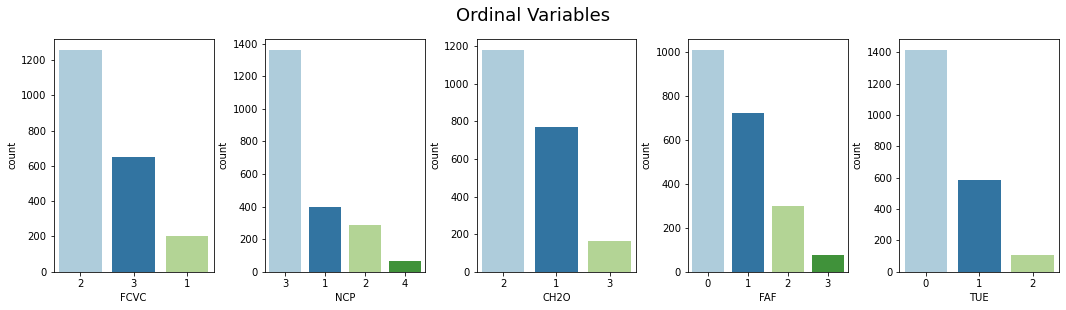

In [15]:
#Ordinal variables
ocolumns = ['FCVC','NCP','CH2O','FAF','TUE']

fig, ax = plt.subplots(1, len(ocolumns), figsize=(16,6))
for col, subplot in zip(ocolumns, ax.flatten()):
    sns.countplot(data= df, x = df[col], ax=subplot, order = df[col].value_counts().index, palette="Paired")
    
#Show figure & plots
fig.suptitle("Ordinal Variables", y = 0.8, fontsize = 18)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=1)
plt.show()

## Machine Learning Models

### Pre-processing data for machine learning

In [16]:
#Label encoder for nominal data
from sklearn.preprocessing import LabelEncoder

#Creating instance of labelencoder
labelencoder = LabelEncoder()

#Assigning numerical values to categorical data
nominal_col = ['Gender', 'FHWO', 'FAVC', 'SMOKE','SCC', 'MTRANS']

for i in nominal_col:
    df[i] = labelencoder.fit_transform(df[i])

In [17]:
df.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2,3,Sometimes,0,2,0,0,1,no,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3,3,Sometimes,1,3,1,3,0,Sometimes,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2,3,Sometimes,0,2,0,2,1,Frequently,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3,3,Sometimes,0,2,0,2,0,Frequently,4,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2,1,Sometimes,0,2,0,0,0,Sometimes,3,Overweight_Level_II


In [18]:
#Encoding ordinal data
temp_dict = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
df['CALC'] = df['CALC'].map(temp_dict)
df['CAEC'] = df['CAEC'].map(temp_dict)

In [19]:
df.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2,3,1,0,2,0,0,1,0,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3,3,1,1,3,1,3,0,1,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2,3,1,0,2,0,2,1,2,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3,3,1,0,2,0,2,0,2,4,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2,1,1,0,2,0,0,0,1,3,Overweight_Level_II


In [20]:
df.dtypes

Gender          int32
Age           float64
Height        float64
Weight        float64
FHWO            int32
FAVC            int32
FCVC            int32
NCP             int32
CAEC            int64
SMOKE           int32
CH2O            int32
SCC             int32
FAF             int32
TUE             int32
CALC            int64
MTRANS          int32
NObeyesdad     object
dtype: object

In [21]:
df.corr()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
Gender,1.000000,0.048394,0.618466,0.161668,0.102512,0.064934,-0.317272,0.023921,-0.091543,0.044698,0.194832,-0.102633,0.174468,0.071148,-0.007616,-0.137537
Age,0.048394,1.000000,-0.025958,0.202560,0.205725,0.063902,-0.016069,-0.071102,-0.083739,0.091987,-0.098992,-0.116283,-0.170416,-0.241917,0.044487,-0.601945
Height,0.618466,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.070032,0.214633,-0.048818,0.055499,0.191061,-0.133753,0.234248,-0.006181,0.129732,-0.073609
Weight,0.161668,0.202560,0.463136,1.000000,0.496820,0.272300,0.201087,0.126058,-0.287493,0.025746,0.052705,-0.201906,-0.158726,-0.274960,0.206677,0.004610
FHWO,0.102512,0.205725,0.247684,0.496820,1.000000,0.208036,0.008332,0.052504,-0.169787,0.017385,0.053889,-0.185422,-0.128375,-0.097283,-0.036676,-0.101540
FAVC,0.064934,0.063902,0.178364,0.272300,0.208036,1.000000,-0.073482,-0.019162,-0.150068,-0.050660,-0.082638,-0.190658,-0.156302,-0.054783,0.089520,-0.069800
FCVC,-0.317272,-0.016069,-0.070032,0.201087,0.008332,-0.073482,1.000000,0.138510,0.100727,0.025567,0.037495,0.070328,0.019344,-0.150120,0.085690,0.105084
NCP,0.023921,-0.071102,0.214633,0.126058,0.052504,-0.019162,0.138510,1.000000,0.122478,0.035825,0.067431,-0.006166,0.126888,0.028048,0.116039,-0.012480
CAEC,-0.091543,-0.083739,-0.048818,-0.287493,-0.169787,-0.150068,0.100727,0.122478,1.000000,0.055282,-0.048315,0.109179,0.098121,0.157565,-0.047540,0.048535
SMOKE,0.044698,0.091987,0.055499,0.025746,0.017385,-0.050660,0.025567,0.035825,0.055282,1.000000,0.014689,0.047731,0.022590,0.063889,0.082471,-0.010702


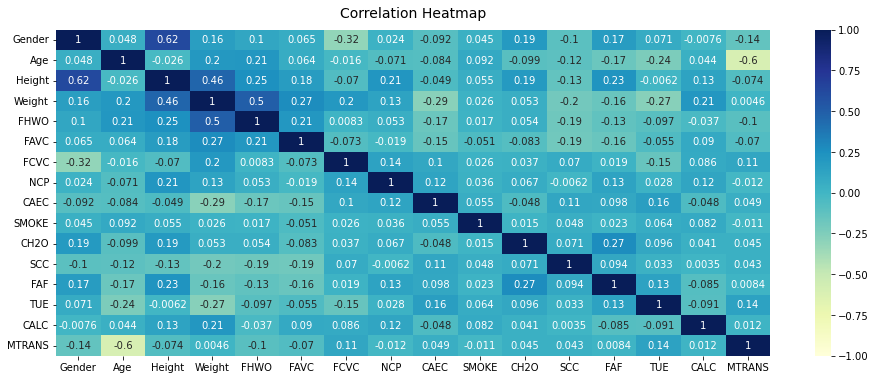

In [22]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap = "YlGnBu")

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)
plt.show()

### Models

#### 1. DecisionTree Classifier

In [23]:
#Loading train,test & split package
from sklearn.model_selection import train_test_split

#Separate features from target variable
X_dt = df.drop(['NObeyesdad','Weight' ,'Height'],axis=1)
y_dt = df[['NObeyesdad']]

#Split the data into training and testing with a ratio of 15:85 for testing:training
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, test_size = 0.2, random_state = 42)

#Loading Decision tree classifier package
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = "gini", random_state = 42)

#Fit training data into the decision tree model
classifier_dt.fit(X_dt_train,y_dt_train)

#Predict the target value using the decision tree model
y_dt_pred = classifier_dt.predict(X_dt_test)


Accuracy Score: 76.36 %

                     precision    recall  f1-score   support

Insufficient_Weight       0.80      0.88      0.84        56
      Normal_Weight       0.62      0.55      0.58        62
     Obesity_Type_I       0.74      0.74      0.74        78
    Obesity_Type_II       0.87      0.91      0.89        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.60      0.68      0.64        56
Overweight_Level_II       0.67      0.56      0.61        50

           accuracy                           0.76       423
          macro avg       0.76      0.76      0.76       423
       weighted avg       0.76      0.76      0.76       423


Confusion Matrix



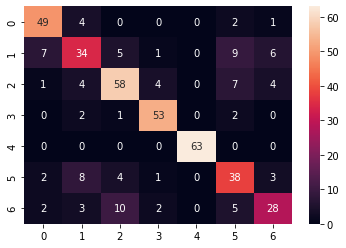

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report

# Evaluating the results
print('')
print("Accuracy Score:",round(accuracy_score(y_dt_test,y_dt_pred)*100,2),'%')

print('')
print(classification_report(y_dt_test, y_dt_pred))

print('')
print("Confusion Matrix\n")
sns.heatmap(confusion_matrix(y_dt_test, y_dt_pred), annot = True, fmt ='g')
plt.show()

In [25]:
#Calculate feature importance
importances = classifier_dt.feature_importances_
importances

array([0.09531411, 0.2892777 , 0.05806149, 0.02170694, 0.10074819,
       0.06378576, 0.08223116, 0.00626098, 0.0533458 , 0.00976149,
       0.0783307 , 0.04016304, 0.05209366, 0.04891898])

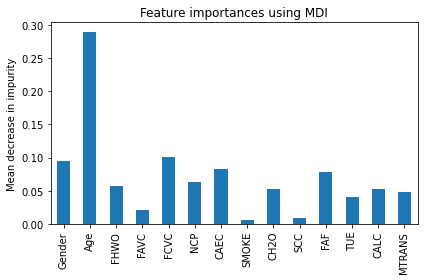

In [26]:
#Plot feature Importance
dt_importances = pd.Series(importances, index=X_dt.columns)

fig, ax = plt.subplots()
dt_importances.plot.bar( ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

##### Feature extraction and retraining the model based on the importance graph

In [27]:
#Separate features from target variable
X_dtf = df.drop(['NObeyesdad','Weight' ,'Height','SCC','SMOKE'],axis=1)
y_dtf = df['NObeyesdad']

#Split the data into training and testing with a ratio of 15:85 for testing:training
X_dtf_train, X_dtf_test, y_dtf_train, y_dtf_test = train_test_split(X_dtf, y_dtf, test_size = 0.2, random_state = 42)

#Loading Decision tree classifier package
from sklearn.tree import DecisionTreeClassifier
classifier_dtf = DecisionTreeClassifier(criterion = "gini", random_state = 40)

#Fit training data into the decision tree model
classifier_dtf.fit(X_dtf_train,y_dtf_train)

#Predict the target value using the decision tree model
y_dtf_pred = classifier_dtf.predict(X_dtf_test)


Accuracy Score: 75.65 %

                     precision    recall  f1-score   support

Insufficient_Weight       0.75      0.88      0.81        56
      Normal_Weight       0.57      0.40      0.47        62
     Obesity_Type_I       0.73      0.77      0.75        78
    Obesity_Type_II       0.85      0.91      0.88        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.62      0.73      0.67        56
Overweight_Level_II       0.71      0.58      0.64        50

           accuracy                           0.76       423
          macro avg       0.75      0.75      0.75       423
       weighted avg       0.75      0.76      0.75       423


Confusion Matrix



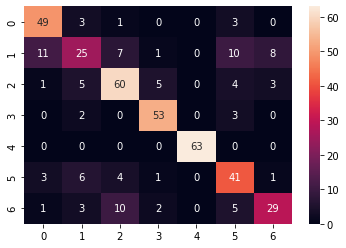

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report

# Evaluating the results
print('')
print("Accuracy Score:",round(accuracy_score(y_dtf_test,y_dtf_pred)*100,2),'%')

print('')
print(classification_report(y_dtf_test, y_dtf_pred))

print('')
print("Confusion Matrix\n")
sns.heatmap(confusion_matrix(y_dtf_test, y_dtf_pred), annot = True, fmt ='g')
plt.show()

#### 2. RandomForest Classifier

In [29]:
#Separate features from target variable and save in X
X_rf = df.drop(['NObeyesdad','Height','Weight'],axis=1)

#Separate the target and save it in y
y_rf = df['NObeyesdad']

# Splitting the dataset into the Training set and Test set
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2)

# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_rf_train, y_rf_train)

# Predicting the Test set results
y_rf_pred = classifier_rf.predict(X_rf_test)


Accuracy Score: 84.63 %

                     precision    recall  f1-score   support

Insufficient_Weight       0.80      0.86      0.83        51
      Normal_Weight       0.64      0.71      0.67        51
     Obesity_Type_I       0.84      0.86      0.85        66
    Obesity_Type_II       0.94      0.91      0.92        66
   Obesity_Type_III       0.99      0.99      0.99        76
 Overweight_Level_I       0.85      0.76      0.80        62
Overweight_Level_II       0.80      0.76      0.78        51

           accuracy                           0.85       423
          macro avg       0.84      0.84      0.84       423
       weighted avg       0.85      0.85      0.85       423


Confusion Matrix



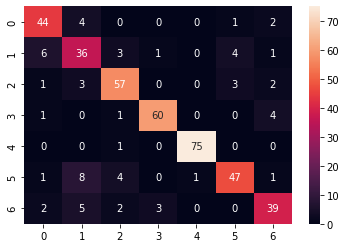

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report

# Evaluating the results
print('')
print("Accuracy Score:",round(accuracy_score(y_rf_test,y_rf_pred)*100,2),'%')

print('')
print(classification_report(y_rf_test, y_rf_pred))

print('')
print("Confusion Matrix\n")
sns.heatmap(confusion_matrix(y_rf_test, y_rf_pred), annot = True, fmt ='g')
plt.show()

In [31]:
from rfpimp import *

#Function for feature importance plot
def showimp(rf, X, y):
    features = list(X.columns)
    I = importances(rf, X, y, features=features)
    plot_importances(I, color='#4575b4')

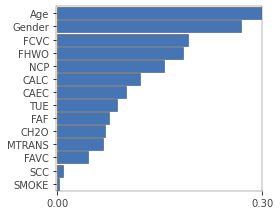

In [32]:
showimp(classifier_rf, X_rf, y_rf)

##### Feature extraction and retraining the model based on the importance graph

In [48]:
#Separate features from target variable and save in X
X_rff = df.drop(['NObeyesdad','Height','Weight','SMOKE'],axis=1)

#Separate the target and save it in y
y_rff = df['NObeyesdad']

# Splitting the dataset into the Training set and Test set
X_rff_train, X_rff_test, y_rff_train, y_rff_test = train_test_split(X_rff, y_rff, test_size=0.2)

# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rff = RandomForestClassifier(n_estimators = 120, criterion = 'entropy', random_state = 0)
classifier_rff.fit(X_rff_train, y_rff_train)

# Predicting the Test set results
y_rff_pred = classifier_rff.predict(X_rff_test)


Accuracy Score: 84.63 %

                     precision    recall  f1-score   support

Insufficient_Weight       0.84      0.94      0.89        63
      Normal_Weight       0.71      0.69      0.70        64
     Obesity_Type_I       0.83      0.84      0.84        64
    Obesity_Type_II       0.86      0.88      0.87        50
   Obesity_Type_III       1.00      0.99      0.99        70
 Overweight_Level_I       0.83      0.80      0.81        54
Overweight_Level_II       0.83      0.78      0.80        58

           accuracy                           0.85       423
          macro avg       0.84      0.84      0.84       423
       weighted avg       0.85      0.85      0.85       423


Confusion Matrix



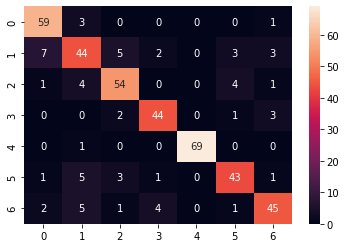

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report

# Evaluating the results
print('')
print("Accuracy Score:",round(accuracy_score(y_rff_test,y_rff_pred)*100,2),'%')

print('')
print(classification_report(y_rff_test, y_rff_pred))

print('')
print("Confusion Matrix\n")
sns.heatmap(confusion_matrix(y_rff_test, y_rff_pred), annot = True, fmt ='g')
plt.show()

#### 3. KNN Classifier

In [35]:
#Separate features from target variable and save in X
X_knn = df.drop(['NObeyesdad','Height','Weight'],axis=1)

#Separate the target and save it in y
y_knn = df['NObeyesdad']

# Splitting the dataset into the Training set and Test set
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, test_size=0.2,stratify=y_knn, random_state=42)

# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=5, p=2, weights='uniform', algorithm='auto')
classifier_knn.fit(X_knn_train, y_knn_train)

# Predicting the Test set results
y_knn_pred = classifier_knn.predict(X_knn_test)


Accuracy Score: 74.47 %

                     precision    recall  f1-score   support

Insufficient_Weight       0.67      0.94      0.78        54
      Normal_Weight       0.69      0.34      0.46        58
     Obesity_Type_I       0.68      0.76      0.72        70
    Obesity_Type_II       0.77      0.90      0.83        60
   Obesity_Type_III       0.93      0.98      0.96        65
 Overweight_Level_I       0.70      0.60      0.65        58
Overweight_Level_II       0.75      0.66      0.70        58

           accuracy                           0.74       423
          macro avg       0.74      0.74      0.73       423
       weighted avg       0.74      0.74      0.73       423


Confusion Matrix



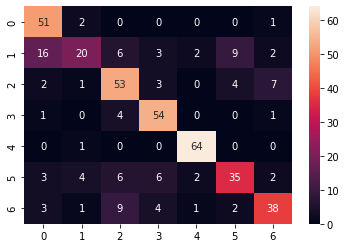

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report

# Evaluating the results
print('')
print("Accuracy Score:",round(accuracy_score(y_knn_test,y_knn_pred)*100,2),'%')

print('')
print(classification_report(y_knn_test, y_knn_pred))

print('')
print("Confusion Matrix\n")
sns.heatmap(confusion_matrix(y_knn_test, y_knn_pred), annot = True, fmt ='g')
plt.show()

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Separate features from target variable and save in X
X_knnf = df.drop(['NObeyesdad','Height','Weight'],axis=1)

#Separate the target and save it in y
y_knnf = df['NObeyesdad']

# Splitting the dataset into the Training set and Test set
X_knnf_train, X_knnf_test, y_knnf_train, y_knnf_test = train_test_split(X_knnf, y_knnf, test_size=0.2,stratify=y_knnf, random_state=42)


# Create a pipeline
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Create the parameter grid
param_grid = [{
    'kneighborsclassifier__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'kneighborsclassifier__p': [1, 2],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}]

# Create a grid search instance
gs = GridSearchCV(pipeline, param_grid = param_grid,
                  scoring='accuracy',
                  refit=True,
                  cv=10,
                  verbose=1,
                  n_jobs=2)

# Fit the most optimal model
gs.fit(X_knnf_train, y_knnf_train)

# Print the best model parameters and scores
print('Best Score: %.3f' % gs.best_score_, '\nBest Parameters: ', gs.best_params_)

# Print the model score for test data
print('Score: %.3f' % gs.score(X_knnf_test, y_knnf_test))

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Best Score: 0.797 
Best Parameters:  {'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 2, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'distance'}
Score: 0.794


In [38]:
#Separate features from target variable and save in X
X_knnf = df.drop(['NObeyesdad','Height','Weight'],axis=1)

#Separate the target and save it in y
y_knnf = df['NObeyesdad']

# Splitting the dataset into the Training set and Test set
X_knnf_train, X_knnf_test, y_knnf_train, y_knnf_test = train_test_split(X_knnf, y_knnf, test_size=0.2,stratify=y_knnf, random_state=42)

# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knnf = KNeighborsClassifier(n_neighbors=2, p=1, weights='distance', algorithm='auto')
classifier_knnf.fit(X_knnf_train, y_knnf_train)

# Predicting the Test set results
y_knnf_pred = classifier_knnf.predict(X_knnf_test)


Accuracy Score: 81.32 %

                     precision    recall  f1-score   support

Insufficient_Weight       0.78      0.94      0.86        54
      Normal_Weight       0.73      0.57      0.64        58
     Obesity_Type_I       0.78      0.77      0.78        70
    Obesity_Type_II       0.79      0.90      0.84        60
   Obesity_Type_III       0.97      0.98      0.98        65
 Overweight_Level_I       0.80      0.78      0.79        58
Overweight_Level_II       0.80      0.74      0.77        58

           accuracy                           0.81       423
          macro avg       0.81      0.81      0.81       423
       weighted avg       0.81      0.81      0.81       423


Confusion Matrix



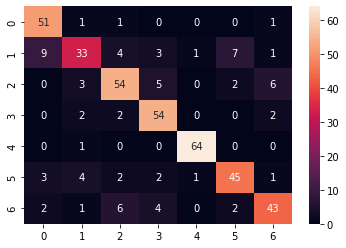

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report

# Evaluating the results
print('')
print("Accuracy Score:",round(accuracy_score(y_knnf_test,y_knnf_pred)*100,2),'%')

print('')
print(classification_report(y_knnf_test, y_knnf_pred))

print('')
print("Confusion Matrix\n")
sns.heatmap(confusion_matrix(y_knnf_test, y_knnf_pred), annot = True, fmt ='g')
plt.show()

#### 4. SVM Classifier

In [40]:
#Separate features from target variable and save in X
X_svm = df.drop(['NObeyesdad','Height','Weight'],axis=1)

#Separate the target and save it in y
y_svm = df['NObeyesdad']

# Splitting the dataset into the Training set and Test set
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X_svm, y_svm, test_size=0.2)

# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svm = SVC(kernel='rbf', random_state=1, gamma=0.5, C=10.0)
classifier_svm.fit(X_svm_train, y_svm_train)


# Predicting the Test set results
y_svm_pred = classifier_svm.predict(X_svm_test)


Accuracy Score: 79.91 %

                     precision    recall  f1-score   support

Insufficient_Weight       0.86      0.84      0.85        50
      Normal_Weight       0.64      0.73      0.69        67
     Obesity_Type_I       0.70      0.65      0.67        60
    Obesity_Type_II       0.85      0.89      0.87        53
   Obesity_Type_III       1.00      1.00      1.00        78
 Overweight_Level_I       0.79      0.79      0.79        56
Overweight_Level_II       0.74      0.66      0.70        59

           accuracy                           0.80       423
          macro avg       0.80      0.79      0.79       423
       weighted avg       0.80      0.80      0.80       423


Confusion Matrix



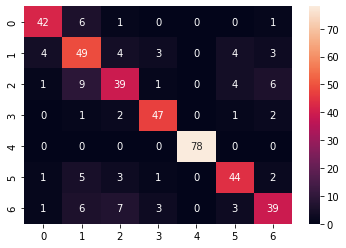

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report

# Evaluating the results
print('')
print("Accuracy Score:",round(accuracy_score(y_svm_test,y_svm_pred)*100,2),'%')

print('')
print(classification_report(y_svm_test, y_svm_pred))

print('')
print("Confusion Matrix\n")
sns.heatmap(confusion_matrix(y_svm_test, y_svm_pred), annot = True, fmt ='g')
plt.show()

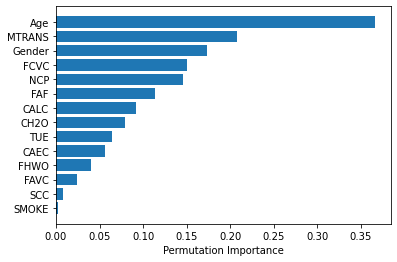

In [42]:
#Plot feature importance for SVM with rbf kernel
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(classifier_svm, X_svm_test, y_svm_test)

feature_names = list(X_svm.columns)
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

##### Feature extraction and retraining the model based on the importance graph

In [43]:
#Separate features from target variable and save in X
X_svmf = df.drop(['NObeyesdad','Height','Weight','SMOKE'],axis=1)

#Separate the target and save it in y
y_svmf = df['NObeyesdad']

# Splitting the dataset into the Training set and Test set
X_svmf_train, X_svmf_test, y_svmf_train, y_svmf_test = train_test_split(X_svmf, y_svmf, test_size=0.2)

# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svmf = SVC(kernel='rbf', random_state=10, gamma=0.8, C=1.0)
classifier_svmf.fit(X_svmf_train, y_svmf_train)


# Predicting the Test set results
y_svmf_pred = classifier_svmf.predict(X_svmf_test)


Accuracy Score: 80.85 %

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.83      0.90        52
      Normal_Weight       0.45      0.85      0.59        48
     Obesity_Type_I       0.86      0.85      0.85        79
    Obesity_Type_II       0.95      0.86      0.90        65
   Obesity_Type_III       1.00      1.00      1.00        54
 Overweight_Level_I       0.82      0.64      0.72        64
Overweight_Level_II       0.85      0.66      0.74        61

           accuracy                           0.81       423
          macro avg       0.84      0.81      0.81       423
       weighted avg       0.85      0.81      0.82       423


Confusion Matrix



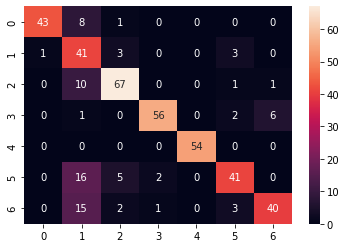

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report

# Evaluating the results
print('')
print("Accuracy Score:",round(accuracy_score(y_svmf_test,y_svmf_pred)*100,2),'%')

print('')
print(classification_report(y_svmf_test, y_svmf_pred))

print('')
print("Confusion Matrix\n")
sns.heatmap(confusion_matrix(y_svmf_test, y_svmf_pred), annot = True, fmt ='g')
plt.show()

#### Results

In [50]:
d = {'Models': ['DecisionTree','RandomForest','KNN','SVM'], 
     'Accuracy': [round(accuracy_score(y_dt_test,y_dt_pred)*100,2),round(accuracy_score(y_rf_test,y_rf_pred)*100,2),round(accuracy_score(y_knn_test,y_knn_pred)*100,2),round(accuracy_score(y_svm_test,y_svm_pred)*100,2)],
     'Retrained Accuracy': [round(accuracy_score(y_dtf_test,y_dtf_pred)*100,2),round(accuracy_score(y_rff_test,y_rff_pred)*100,2),round(accuracy_score(y_knnf_test,y_knnf_pred)*100,2),round(accuracy_score(y_svmf_test,y_svmf_pred)*100,2)]}

In [51]:
result = pd.DataFrame(data=d)
result

,Models,Accuracy,Retrained Accuracy
0,DecisionTree,76.36,75.65
1,RandomForest,84.63,84.63
2,KNN,74.47,81.32
3,SVM,79.91,80.85


`Out of all four models, Random Forest model has the best accuracy score before and after feature selection as listed above. Additionally, for each class of target variable the precision score is higher in Random Forest than other models. For three classes of obesity, precision score is more than 80% which is sufficient for this dataset.`

In [52]:
# Evaluating the results
print('')
print("Accuracy Score:",round(accuracy_score(y_rff_test,y_rff_pred)*100,2),'%')

print('')
print(classification_report(y_rff_test, y_rff_pred))


Accuracy Score: 84.63 %

                     precision    recall  f1-score   support

Insufficient_Weight       0.84      0.94      0.89        63
      Normal_Weight       0.71      0.69      0.70        64
     Obesity_Type_I       0.83      0.84      0.84        64
    Obesity_Type_II       0.86      0.88      0.87        50
   Obesity_Type_III       1.00      0.99      0.99        70
 Overweight_Level_I       0.83      0.80      0.81        54
Overweight_Level_II       0.83      0.78      0.80        58

           accuracy                           0.85       423
          macro avg       0.84      0.84      0.84       423
       weighted avg       0.85      0.85      0.85       423

